<a href="https://colab.research.google.com/github/kaladin123/DSA-Practice/blob/main/go_digit_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Input Data

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bookingcom-job-listings:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1966094%2F3243822%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T121948Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D61054891b1793f1f572a9c084b5ff0a0a8e35457deb988a1225f794ca9eeee596b7b36897f1861f73157147c7f26f1e8ff009ffdc9137627b396ce28df3bf428d034cf38688350f8fa12b0e5e0fb8a4dac6a5bf97ba42e8633acc0655248a3d901c5f97aee24735865a470ff238eb65a5798cb95acb0c721b03cb8f80cb589327992a26c3b361497a1a9c9f00e8d90d6e76b7bbd050643864a307b3ea032f675dd0033094d1a7f1df255b89b975dd0e41740eac43a3025823b45f11ca867dfa3f72e0486cb8509ffe260a0954638c4fd9e6de1a897e0c40151f0956875859bb853733c963a1e2209b6a28363f99adc14ed32ddfeaef0f86b4ca203958961fd2e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1751815 bytes downloaded
Downloaded and uncompressed: bookingcom-job-listings
Data source import complete.


# Imports

In [2]:
#Imports
import numpy as np
import pandas as pd
import itertools

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.options.display.max_colwidth = 500

#String manipulations
import re, string
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

#NLTK Packages: Un-comment lines below to download relevant NLTK packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

#Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

# #Plot output
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [18,10]
# plt.rcParams['figure.dpi'] = 150
# %config InlineBackend.figure_format = 'svg'

#Booking.com colorscheme RGBA
blue_d = np.array([0/256, 53/256, 128/256, 1])
blue_l = np.array([0/256, 159/256, 227/256, 1])
yellow = np.array([254/256, 186/256, 2/256, 1])
grey = np.array([102/256, 102/256, 102/256, 1])
white = np.array([242/256, 246/256, 250/256, 1])

#Booking.com colormaps (RGBA)
cmap1 = ListedColormap([blue_d])
cmap2 = ListedColormap([blue_d,blue_l])
cmap3 = ListedColormap([blue_d,blue_l,yellow])
cmap4 = ListedColormap([blue_d,blue_l,yellow,grey])
cmap5 = ListedColormap([blue_d,blue_l,yellow,grey,white])

#Booking.com palettes (Hex)
c1 = ['#003580']
c2 = ['#003580', '#009fe3']
c3 = ['#003580', '#009fe3', '#feba02']
c4 = ['#003580', '#009fe3', '#feba02', '#666']
c5 = ['#003580', '#009fe3', '#feba02', '#666', '#f2f6fa']
c15 = ['#003580', '#009fe3', '#feba02', '#D9958D', '#00C4CC', '#77A0D9', '#8CB811', '#F57D00', '#4A8594', '#D52685', '#CE1126', '#553A99', '#D9958D','#0EA013', '#8283FA']

#Booking.com settings Seaborn
sns.set(rc={'axes.facecolor':'#f2f6fa', 'figure.facecolor':'#f2f6fa'})
sns.set_palette(sns.color_palette(c3))

#Wordcloud
from wordcloud import WordCloud

#Quality of Life
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Reading Input Data

In [3]:
df = pd.read_csv('../input/bookingcom-job-listings/Booking_Jobs_All_220218.csv')

In [4]:
df = df[['Job Description']]

In [5]:
texts = df['Job Description'].tolist()

In [7]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load a pre-trained model
model = SentenceTransformer('BAAI/bge-small-en-v1.5')

# # Sample texts (replace these with your actual texts)
# texts = [
#     "The cat sits on the mat",
#     "Dogs are loyal pets",
#     "Tesla launches new electric car",
#     "Ford reveals new hybrid model",
#     "Machine learning in AI",
#     "Deep learning for NLP tasks"
# ]

# Encode texts to get sentence embeddings
embeddings = model.encode(texts)

# Range of possible cluster numbers to evaluate
cluster_range = range(2, 20)  # At least 2 clusters, up to the number of texts

# Initialize variables to store the best score and corresponding number of clusters
best_score = -1
best_n_clusters = 0

silhouette_scores = []

for n_clusters in cluster_range:
    print(n_clusters)
    clustering_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clustering_model.fit_predict(embeddings)
    score = silhouette_score(embeddings, cluster_labels)

    # Store the score for plotting
    silhouette_scores.append(score)

    # Update best score and cluster number if this score is better
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"Best number of clusters: {best_n_clusters}, Silhouette Score: {best_score}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(list(cluster_range))
plt.show()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/93.0k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Perform text pre-processing steps and explain why that step is useful for the given task (2 marks)

In order to prepare our text for analysis we need to transform it to be more meaningful. This process will look as follows:

>1. Create lowercase
>2. Tokenization
>3. Removing Stopwords
>4. Normalization
>5. Removing Punctuation
>6. Character Removal

**1. Create lowercase**
The first step towards a cleaned text is removing obstacles that make comparison more difficult. An easy way to start is by using lowercase for all text to ignore capitalization.

**2. Tokenization**
Tokenisation is a technique for breaking down a piece of text into small units, called tokens. A token may be a word, part of a word or just characters like punctuation.

**3. Removing Stopwords**
Stopwords are frequently used words such as I, a, an, in etc. They do not contribute significantly to the information content of a sentence, so it is advisable to remove them by storing a list of words that we consider stopwords. The library nltk has such lists for 16 different languages that we can refer to.

**4. Normalization**
Text normalization tries to reduce the randomness in text and bring it closer to a predefined standard. This has the effect of reducing the amount of different information and thus improving efficiency. There are two methods for this:

1. Stemming: reducing words to their root or root form (e.g. _Caring_ becomes _Car_)
2. Lemmatization: reducing words to their base word (e.g. _Caring_ becomes _Care_)

The aim of these normalization techniques is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. However, the lemmatization algorithms try to reduce the inflected words correctly so that the affiliation of the base word to the language is guaranteed. This aligns better with our project goals, so we'll only use lemmatization as a normalization technique.

Lemmatization uses context to establish which grammatical group a word belongs to (noun, adjective, verb, etc.), called Part-of-speech tagging (POS tagging). Because only one of these tags can be applied when lemmatizing **we start by creating a function that aims to find the correct POS tag before cleaning the text.**

**5. Removing Punctuation**
Punctuation is essentially a set of symbols that offer little in terms of understanding our text as words. Tokenization splits text into words, but it also into punctuation marks. So removing these symbols creates a set of words and parts of words whilst removing the noise.

**6. Character Removal**
After tokenization and the removal of punctuation we can still be left with single/double characters. Most of these will be of no added value to our analysis, with the exception of the programming language R.

In [7]:
def get_pos_func(word):
    '''
    Maps the respective POS tag of a word to the format accepted by the Wordnet lemmatizer

    Args:
        word (str): Word to which the function is to be applied

    Returns:
        POS tag, readable for the Wordnet lemmatizer
    '''
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def clean_string_func(text, x):
    '''
    Create cleaned text or list of words

    Step 1: Use word_tokenize() to get tokens from lowered string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
            POS tag is determined with the help of function get_wordnet_pos()
    Step 3: Remove stopwords by iterating through tokens
    Step 4: Remove single characters by iterating through tokens
    Step 5: Remove punctuation by iterating through tokens
    Step 6: Join words to create text

    Args:
        text (str): String to which the functions are to be applied, string
        x (str): Letter that denotes return type ('w' = words, otherwise text)

    Returns:
        List of lemmatize words
        String with lemmatized words
    '''
    words = word_tokenize(text.lower()) #Create tokens from text and transform to lowercase
    words = [WordNetLemmatizer().lemmatize(word, get_pos_func(word)) for word in words] #Lemmatize words through appropriate POS from get_pos_func
    words = [wrd for wrd in words if wrd not in stopwords.words('english')] #Remove all words that appear in stopword list
    words = [wrd for wrd in words if len(wrd) > 1 and len(wrd) != 'r'] #Remove single character words that's not programming language R
    words = [wrd for wrd in words if wrd not in string.punctuation] #Remove punctuation
    text = ' '.join(words) #Join words to create text

    if x == 'w':
        return words
    return text



In [8]:
print('Original text: \n{}'.format(df['Job Description'][0][:500]))

Original text: 
Booking.com
It wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone.
In fact, that’s what we do at Booking.com. We make it easier for everyone to experience the world. And while that world might feel a little farther away right now, we’re busy preparing for when the world is ready to travel once more.
Across our offices worldwide, we


In [9]:
print('Cleaned text: \n{}'.format(clean_string_func(df['Job Description'][0],'t')[:500]))

Cleaned text: 
booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission un


In [10]:
df['Job Description - Cleaned'] = df['Job Description'].apply(lambda x : clean_string_func(x,'t')) #Create new column of cleaned job descriptions

# Identify # of natural clusters in the data (2 marks)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the processed job descriptions into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Job Description - Cleaned'])

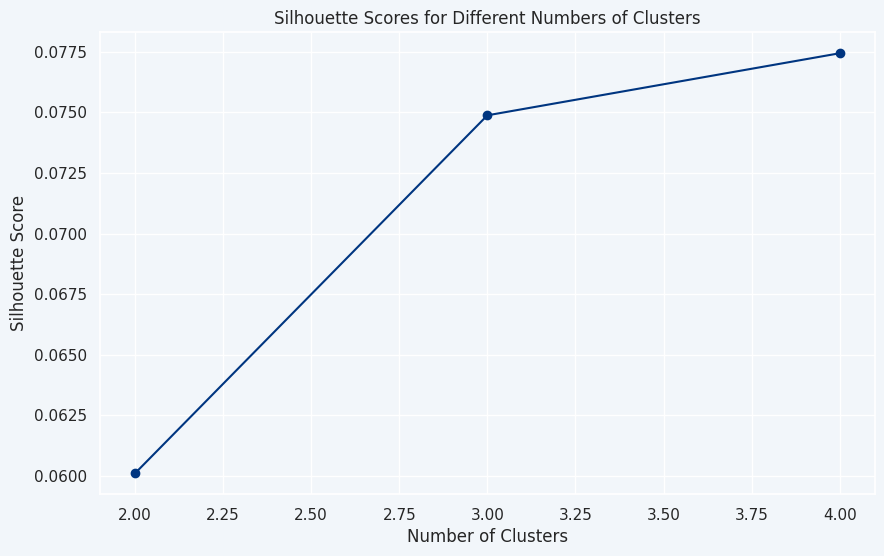

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the processed job descriptions into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Job Description - Cleaned'])

# Function to calculate silhouette score for various number of clusters
def calculate_silhouette_scores(X, max_clusters=4):
    scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append((n_clusters, score))
    return scores

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = calculate_silhouette_scores(tfidf_matrix)

# Plot the silhouette scores
import matplotlib.pyplot as plt

n_clusters = [score[0] for score in silhouette_scores]
silhouette_scores_values = [score[1] for score in silhouette_scores]

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, silhouette_scores_values, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [13]:
!pip install transformers torch


In [14]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "distilbert-base-uncased"  # Example model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [15]:
sents = df.iloc[0].tolist()[:2]

In [16]:
df.columns

Index(['Job Description', 'Job Description - Cleaned'], dtype='object')

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
# Sentences we want sentence embeddings for
sentences = df['Job Description'].tolist()

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-small-en-v1.5')
model = AutoModel.from_pretrained('BAAI/bge-small-en-v1.5')
model.eval()

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
# for s2p(short query to long passage) retrieval task, add an instruction to query (not add instruction for passages)
# encoded_input = tokenizer([instruction + q for q in queries], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)
    # Perform pooling. In this case, cls pooling.
    sentence_embeddings = model_output[0][:, 0]
# normalize embeddings
sentence_embeddings = torch.nn.functional.normalize(sentence_embeddings, p=2, dim=1)
print("Sentence embeddings:", sentence_embeddings[:2])


tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

In [ ]:
sentence_embeddings.numpy()

In [ ]:
# Function to calculate silhouette score for various number of clusters
def calculate_silhouette_scores(X, max_clusters=4):
    scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append((n_clusters, score))
    return scores
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = calculate_silhouette_scores(sentence_embeddings.numpy())

# Plot the silhouette scores
import matplotlib.pyplot as plt

n_clusters = [score[0] for score in silhouette_scores]
silhouette_scores_values = [score[1] for score in silhouette_scores]

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, silhouette_scores_values, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [15]:

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = calculate_silhouette_scores(tfidf_matrix, max_clusters=50)

# Plot the silhouette scores
import matplotlib.pyplot as plt

n_clusters = [score[0] for score in silhouette_scores]
silhouette_scores_values = [score[1] for score in silhouette_scores]

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, silhouette_scores_values, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

NameError: name 'calculate_silhouette_scores' is not defined